# Import Library

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer, load_wine, fetch_covtype

from torch.utils.data import  TensorDataset, DataLoader #Data사용 쉽게함
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

# Fetch_covtype 실전 data

In [2]:
data=fetch_covtype() #iris classification, 3 multi classes

In [3]:
data

{'DESCR': ".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30×30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like 'Bunch' object\nwith the feature matrix in the ``data`` member\nand the targe

In [4]:
data.feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_0',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Soil_Type_0',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39']

In [5]:
data.target

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

In [6]:
len(set(data.target)) # target class 개수 : 7

7

In [7]:
X = data.data[:10000] #X
y = data.target[:10000] #y

In [8]:
X.shape #54개의 X features, 581012 samples

(10000, 54)

In [9]:
y.shape

(10000,)

In [10]:
df= pd.DataFrame(data=X,columns= data.feature_names)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.info() #모든 예측변수 모두 float. one-hot encoding 필요 X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           10000 non-null  float64
 1   Aspect                              10000 non-null  float64
 2   Slope                               10000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    10000 non-null  float64
 4   Vertical_Distance_To_Hydrology      10000 non-null  float64
 5   Horizontal_Distance_To_Roadways     10000 non-null  float64
 6   Hillshade_9am                       10000 non-null  float64
 7   Hillshade_Noon                      10000 non-null  float64
 8   Hillshade_3pm                       10000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  10000 non-null  float64
 10  Wilderness_Area_0                   10000 non-null  float64
 11  Wilderness_Area_1                   10000 

In [12]:
df.isna().sum() #결측값 존재 X

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [13]:
#pytorch gpu 사용
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify= y, shuffle = True)
#stratify로 y클래스(0과1) 비율 유지하면서 split

x_train = torch.FloatTensor(x_train).to(device) #32bit float
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test) #64bit integer

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

In [15]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [16]:
print(x_train.shape)

torch.Size([7000, 54])


In [17]:
batch_size = 16

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

## ReLU와 LeakyReLU 메소드오버라이딩으로 정의

In [18]:
class relu(torch.nn.ReLU):
    def forward(self,x): #method overriding
        return torch.max(torch.zeros_like(x),x) 
#torch.max: input 텐서에 있는 모든 요소의 최대 값 반환
#torch.zeros_like: 입력값 size만큼의 0 텐서 생성

In [19]:
class leakyrelu(torch.nn.LeakyReLU):
    def forward(self,x): #method overriding
        return torch.max(0.01*x,x) 
#torch.max: input 텐서에 있는 모든 요소의 최대 값 반환
#torch.zeros_like: 입력값 size만큼의 0 텐서 생성

In [20]:
class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(54,7000,bias=True), # input_layer = 54, hidden_layer1 = 7000
            relu(),
            nn.BatchNorm1d(7000)
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(7000,40,bias=True), # hidden_layer1 = 7000, hidden_layer2 =40 
            relu()
        )

        self.layer3 = nn.Sequential(
            nn.Linear(40,20, bias=True), # hidden_layer2 = 40, hidden_layer3 = 20
            relu()
        )
        
        self.layer4 = nn.Sequential(
            nn.Linear(20,10, bias=True), # hidden_layer3 = 20, output_layer = 10
            nn.Softmax()
        )
   

    def forward(self,x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output    

In [21]:
def init_weights(layer): #가중치 초기화
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)
        layer.bias.data.fill_(0.01) #편차 초기화

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [22]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=54, out_features=7000, bias=True)
    (1): relu()
    (2): BatchNorm1d(7000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=7000, out_features=40, bias=True)
    (1): relu()
  )
  (layer3): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): relu()
  )
  (layer4): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [23]:
loss_fn  = nn.CrossEntropyLoss().to(device)
lr = 0.0001
optimizer = optim.Adam(model.parameters(), lr)

In [24]:
from tqdm import tqdm

In [25]:
losses = []
epoch = 1000
for i in tqdm(range(epoch)):

    optimizer.zero_grad()
    hypothesis = model(x_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())

    if i%10 == 0:
        print(i, cost.item())

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
  0%|          | 4/1000 [00:02<08:42,  1.91it/s]

0 2.3142874240875244


  2%|▏         | 15/1000 [00:03<01:35, 10.32it/s]

10 2.1603174209594727


  3%|▎         | 27/1000 [00:03<00:47, 20.56it/s]

20 2.1038920879364014


  4%|▎         | 35/1000 [00:03<00:37, 25.55it/s]

30 2.066403865814209


  5%|▍         | 47/1000 [00:04<00:32, 29.74it/s]

40 2.0376245975494385


  6%|▌         | 55/1000 [00:04<00:30, 31.25it/s]

50 2.011669397354126


  7%|▋         | 67/1000 [00:04<00:28, 32.24it/s]

60 1.9860177040100098


  8%|▊         | 75/1000 [00:04<00:28, 32.13it/s]

70 1.9651073217391968


  9%|▊         | 87/1000 [00:05<00:27, 32.70it/s]

80 1.9481760263442993


 10%|▉         | 95/1000 [00:05<00:27, 32.53it/s]

90 1.9343783855438232


 11%|█         | 107/1000 [00:05<00:27, 32.82it/s]

100 1.9246915578842163


 12%|█▏        | 115/1000 [00:06<00:26, 32.94it/s]

110 1.9160833358764648


 13%|█▎        | 127/1000 [00:06<00:26, 32.87it/s]

120 1.9071097373962402


 14%|█▎        | 135/1000 [00:06<00:26, 32.65it/s]

130 1.8986293077468872


 15%|█▍        | 147/1000 [00:07<00:26, 32.56it/s]

140 1.8902946710586548


 16%|█▌        | 155/1000 [00:07<00:25, 32.78it/s]

150 1.8809393644332886


 17%|█▋        | 167/1000 [00:07<00:25, 32.83it/s]

160 1.8703070878982544


 18%|█▊        | 175/1000 [00:07<00:25, 32.90it/s]

170 1.8610804080963135


 19%|█▊        | 187/1000 [00:08<00:24, 32.86it/s]

180 1.8529419898986816


 20%|█▉        | 195/1000 [00:08<00:24, 32.97it/s]

190 1.8443399667739868


 21%|██        | 207/1000 [00:08<00:24, 32.94it/s]

200 1.8363715410232544


 22%|██▏       | 215/1000 [00:09<00:23, 32.94it/s]

210 1.829416275024414


 23%|██▎       | 227/1000 [00:09<00:23, 32.90it/s]

220 1.82307767868042


 24%|██▎       | 235/1000 [00:09<00:23, 32.91it/s]

230 1.8174313306808472


 25%|██▍       | 247/1000 [00:10<00:22, 32.91it/s]

240 1.8122364282608032


 26%|██▌       | 255/1000 [00:10<00:22, 32.96it/s]

250 1.807150959968567


 27%|██▋       | 267/1000 [00:10<00:22, 32.93it/s]

260 1.8019812107086182


 28%|██▊       | 275/1000 [00:11<00:22, 32.85it/s]

270 1.7971782684326172


 29%|██▊       | 287/1000 [00:11<00:21, 32.91it/s]

280 1.7927626371383667


 30%|██▉       | 295/1000 [00:11<00:21, 32.96it/s]

290 1.7887192964553833


 31%|███       | 307/1000 [00:11<00:21, 32.63it/s]

300 1.7846553325653076


 32%|███▏      | 315/1000 [00:12<00:20, 32.80it/s]

310 1.7809802293777466


 33%|███▎      | 327/1000 [00:12<00:20, 32.91it/s]

320 1.777623176574707


 34%|███▎      | 335/1000 [00:12<00:20, 32.53it/s]

330 1.7744793891906738


 35%|███▍      | 347/1000 [00:13<00:19, 32.69it/s]

340 1.771491527557373


 36%|███▌      | 355/1000 [00:13<00:19, 32.88it/s]

350 1.768639087677002


 37%|███▋      | 367/1000 [00:13<00:19, 32.76it/s]

360 1.7656391859054565


 38%|███▊      | 375/1000 [00:14<00:18, 32.90it/s]

370 1.7627806663513184


 39%|███▊      | 387/1000 [00:14<00:18, 32.93it/s]

380 1.7600988149642944


 40%|███▉      | 395/1000 [00:14<00:18, 32.94it/s]

390 1.7575844526290894


 41%|████      | 407/1000 [00:15<00:17, 32.95it/s]

400 1.7551521062850952


 42%|████▏     | 415/1000 [00:15<00:17, 33.01it/s]

410 1.7529648542404175


 43%|████▎     | 427/1000 [00:15<00:17, 32.89it/s]

420 1.7505340576171875


 44%|████▎     | 435/1000 [00:15<00:17, 32.35it/s]

430 1.7482534646987915


 45%|████▍     | 447/1000 [00:16<00:17, 32.46it/s]

440 1.7461504936218262


 46%|████▌     | 455/1000 [00:16<00:16, 32.76it/s]

450 1.7441149950027466


 47%|████▋     | 467/1000 [00:16<00:16, 32.68it/s]

460 1.742207407951355


 48%|████▊     | 475/1000 [00:17<00:16, 32.35it/s]

470 1.7401816844940186


 49%|████▊     | 487/1000 [00:17<00:15, 32.57it/s]

480 1.73823881149292


 50%|████▉     | 495/1000 [00:17<00:15, 32.44it/s]

490 1.7363808155059814


 51%|█████     | 507/1000 [00:18<00:15, 32.77it/s]

500 1.7346618175506592


 52%|█████▏    | 515/1000 [00:18<00:14, 32.91it/s]

510 1.733176589012146


 53%|█████▎    | 527/1000 [00:18<00:14, 32.80it/s]

520 1.7313188314437866


 54%|█████▎    | 535/1000 [00:18<00:14, 32.88it/s]

530 1.730290174484253


 55%|█████▍    | 547/1000 [00:19<00:13, 32.63it/s]

540 1.7285146713256836


 56%|█████▌    | 555/1000 [00:19<00:13, 32.59it/s]

550 1.7268325090408325


 57%|█████▋    | 567/1000 [00:19<00:13, 32.60it/s]

560 1.7251859903335571


 57%|█████▊    | 575/1000 [00:20<00:12, 32.75it/s]

570 1.7240451574325562


 59%|█████▊    | 587/1000 [00:20<00:12, 32.83it/s]

580 1.7223725318908691


 60%|█████▉    | 595/1000 [00:20<00:12, 32.89it/s]

590 1.7213363647460938


 61%|██████    | 607/1000 [00:21<00:11, 32.77it/s]

600 1.7198617458343506


 62%|██████▏   | 615/1000 [00:21<00:11, 32.86it/s]

610 1.7184460163116455


 63%|██████▎   | 627/1000 [00:21<00:11, 32.61it/s]

620 1.7176884412765503


 64%|██████▎   | 635/1000 [00:22<00:11, 32.34it/s]

630 1.716668725013733


 65%|██████▍   | 647/1000 [00:22<00:10, 32.71it/s]

640 1.7151319980621338


 66%|██████▌   | 655/1000 [00:22<00:10, 32.83it/s]

650 1.7139596939086914


 67%|██████▋   | 667/1000 [00:22<00:10, 32.69it/s]

660 1.712654948234558


 68%|██████▊   | 675/1000 [00:23<00:09, 32.73it/s]

670 1.7116814851760864


 69%|██████▊   | 687/1000 [00:23<00:09, 32.85it/s]

680 1.711012601852417


 70%|██████▉   | 695/1000 [00:23<00:09, 32.90it/s]

690 1.7097492218017578


 71%|███████   | 707/1000 [00:24<00:08, 32.90it/s]

700 1.7088178396224976


 72%|███████▏  | 715/1000 [00:24<00:08, 32.94it/s]

710 1.7077710628509521


 73%|███████▎  | 727/1000 [00:24<00:08, 32.89it/s]

720 1.7068524360656738


 74%|███████▎  | 735/1000 [00:25<00:08, 32.72it/s]

730 1.706210970878601


 75%|███████▍  | 747/1000 [00:25<00:07, 32.85it/s]

740 1.705084204673767


 76%|███████▌  | 755/1000 [00:25<00:07, 32.50it/s]

750 1.704789161682129


 77%|███████▋  | 767/1000 [00:26<00:07, 32.49it/s]

760 1.703613042831421


 78%|███████▊  | 775/1000 [00:26<00:06, 32.48it/s]

770 1.702646255493164


 79%|███████▊  | 787/1000 [00:26<00:06, 32.74it/s]

780 1.7017052173614502


 80%|███████▉  | 795/1000 [00:26<00:06, 32.56it/s]

790 1.7008403539657593


 81%|████████  | 807/1000 [00:27<00:05, 32.73it/s]

800 1.7003026008605957


 82%|████████▏ | 815/1000 [00:27<00:05, 32.51it/s]

810 1.6992695331573486


 83%|████████▎ | 827/1000 [00:27<00:05, 32.77it/s]

820 1.6988102197647095


 84%|████████▎ | 835/1000 [00:28<00:05, 32.88it/s]

830 1.69784677028656


 85%|████████▍ | 847/1000 [00:28<00:04, 32.88it/s]

840 1.6971443891525269


 86%|████████▌ | 855/1000 [00:28<00:04, 32.64it/s]

850 1.6965359449386597


 87%|████████▋ | 867/1000 [00:29<00:04, 32.82it/s]

860 1.6961413621902466


 88%|████████▊ | 875/1000 [00:29<00:03, 32.56it/s]

870 1.6947753429412842


 89%|████████▊ | 887/1000 [00:29<00:03, 32.72it/s]

880 1.694214105606079


 90%|████████▉ | 895/1000 [00:29<00:03, 32.82it/s]

890 1.69370698928833


 91%|█████████ | 907/1000 [00:30<00:02, 32.87it/s]

900 1.695435881614685


 92%|█████████▏| 915/1000 [00:30<00:02, 32.60it/s]

910 1.695757269859314


 93%|█████████▎| 927/1000 [00:30<00:02, 32.81it/s]

920 1.692975401878357


 94%|█████████▎| 935/1000 [00:31<00:01, 32.60it/s]

930 1.6913423538208008


 95%|█████████▍| 947/1000 [00:31<00:01, 32.57it/s]

940 1.690184235572815


 96%|█████████▌| 955/1000 [00:31<00:01, 32.34it/s]

950 1.6895148754119873


 97%|█████████▋| 967/1000 [00:32<00:01, 32.70it/s]

960 1.688776969909668


 98%|█████████▊| 975/1000 [00:32<00:00, 32.71it/s]

970 1.687928557395935


 99%|█████████▊| 987/1000 [00:32<00:00, 32.79it/s]

980 1.6873457431793213


100%|█████████▉| 995/1000 [00:33<00:00, 32.60it/s]

990 1.6870232820510864


100%|██████████| 1000/1000 [00:33<00:00, 30.15it/s]


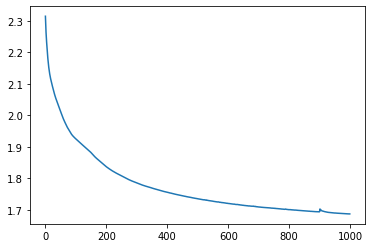

In [26]:
plt.plot(losses)
plt.show()

In [27]:
with torch.no_grad():
    model = model.to('cpu')
    y_pred = model(x_test)
    y_pred = y_pred.detach().numpy()
    predicted = np.argmax(y_pred, axis =1)
    accuracy = (accuracy_score(predicted, y_test))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [28]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.7663223e-15 1.9059047e-06 3.2630776e-08 9.0637468e-03 3.4449790e-30
 2.0880697e-07 9.9093413e-01 1.1225849e-14 3.6173506e-12 8.5390126e-20]
argmax를 한 후의 output은 6
accuracy는 0.692


In [29]:
result = pd.DataFrame(columns={'epoch','learning_rate','optimizer','activate_func','hidden_layer','accuracy'})
result

,activate_func,learning_rate,hidden_layer,epoch,accuracy,optimizer


In [30]:
row={'accuracy':accuracy,'epoch':epoch,'hidden_layer':3,'optimizer':'adam','learning_rate':lr,'activate_func':'ReLU'}
result=result.append(row,ignore_index=True)

In [31]:
result

,activate_func,learning_rate,hidden_layer,epoch,accuracy,optimizer
0,ReLU,0.0001,3,1000,0.692,adam


## Leaky ReLu 이용

In [32]:
class leakyrelu(torch.nn.LeakyReLU):
    def forward(self,x): #method overriding
        return torch.max(0.01*x,x) 
#torch.max: input 텐서에 있는 모든 요소의 최대 값 반환
#torch.zeros_like: 입력값 size만큼의 0 텐서 생성

In [33]:
class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(54,7000,bias=True), # input_layer = 54, hidden_layer1 = 7000
            leakyrelu(),
            nn.BatchNorm1d(7000)
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(7000,40,bias=True), # hidden_layer1 = 7000, hidden_layer2 =40 
            leakyrelu()
        )

        self.layer3 = nn.Sequential(
            nn.Linear(40,20, bias=True), # hidden_layer2 = 40, hidden_layer3 = 20
            leakyrelu()
        )
        
        self.layer4 = nn.Sequential(
            nn.Linear(20,10, bias=True), # hidden_layer3 = 20, output_layer = 10
            nn.Softmax()
        )
   

    def forward(self,x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output    

In [34]:
def init_weights(layer): #가중치 초기화
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform_(layer.weight)
        layer.bias.data.fill_(0.01) #편차 초기화

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [35]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=54, out_features=7000, bias=True)
    (1): leakyrelu(negative_slope=0.01)
    (2): BatchNorm1d(7000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=7000, out_features=40, bias=True)
    (1): leakyrelu(negative_slope=0.01)
  )
  (layer3): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): leakyrelu(negative_slope=0.01)
  )
  (layer4): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [36]:
loss_fn  = nn.CrossEntropyLoss().to(device)
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr)

In [37]:
losses = []
epoch = 1000
for i in tqdm(range(epoch)):

    optimizer.zero_grad()
    hypothesis = model(x_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())

    if i%10 == 0:
        print(i, cost.item())

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
  0%|          | 3/1000 [00:00<00:44, 22.34it/s]

0 2.2722883224487305


  2%|▏         | 15/1000 [00:00<00:44, 22.35it/s]

10 2.0482964515686035


  2%|▏         | 24/1000 [00:01<00:43, 22.29it/s]

20 1.9260698556900024


  3%|▎         | 33/1000 [00:01<00:43, 22.29it/s]

30 1.8797756433486938


  4%|▍         | 45/1000 [00:02<00:42, 22.26it/s]

40 1.8432140350341797


  5%|▌         | 54/1000 [00:02<00:42, 22.18it/s]

50 1.8181225061416626


  6%|▋         | 63/1000 [00:02<00:42, 22.27it/s]

60 1.7923051118850708


  8%|▊         | 75/1000 [00:03<00:41, 22.33it/s]

70 1.7902603149414062


  8%|▊         | 84/1000 [00:03<00:41, 22.23it/s]

80 1.7658623456954956


  9%|▉         | 93/1000 [00:04<00:40, 22.17it/s]

90 1.7514768838882446


 10%|█         | 105/1000 [00:04<00:40, 22.34it/s]

100 1.7447937726974487


 11%|█▏        | 114/1000 [00:05<00:39, 22.39it/s]

110 1.7383590936660767


 12%|█▏        | 123/1000 [00:05<00:39, 22.36it/s]

120 1.7333050966262817


 14%|█▎        | 135/1000 [00:06<00:38, 22.35it/s]

130 1.7315125465393066


 14%|█▍        | 144/1000 [00:06<00:38, 22.28it/s]

140 1.727747917175293


 15%|█▌        | 153/1000 [00:06<00:37, 22.32it/s]

150 1.725711464881897


 16%|█▋        | 165/1000 [00:07<00:37, 22.35it/s]

160 1.7203638553619385


 17%|█▋        | 174/1000 [00:07<00:36, 22.38it/s]

170 1.7167171239852905


 18%|█▊        | 183/1000 [00:08<00:36, 22.32it/s]

180 1.7134586572647095


 20%|█▉        | 195/1000 [00:08<00:36, 22.33it/s]

190 1.709169864654541


 20%|██        | 204/1000 [00:09<00:35, 22.33it/s]

200 1.70590078830719


 21%|██▏       | 213/1000 [00:09<00:35, 22.32it/s]

210 1.7034776210784912


 22%|██▎       | 225/1000 [00:10<00:34, 22.35it/s]

220 1.7012494802474976


 23%|██▎       | 234/1000 [00:10<00:34, 22.35it/s]

230 1.7001123428344727


 24%|██▍       | 243/1000 [00:10<00:33, 22.31it/s]

240 1.6996843814849854


 26%|██▌       | 255/1000 [00:11<00:33, 22.33it/s]

250 1.6969854831695557


 26%|██▋       | 264/1000 [00:11<00:33, 22.21it/s]

260 1.695563793182373


 27%|██▋       | 273/1000 [00:12<00:32, 22.34it/s]

270 1.6952790021896362


 28%|██▊       | 285/1000 [00:12<00:31, 22.35it/s]

280 1.6936880350112915


 29%|██▉       | 294/1000 [00:13<00:31, 22.33it/s]

290 1.6943472623825073


 30%|███       | 303/1000 [00:13<00:31, 22.32it/s]

300 1.7116061449050903


 32%|███▏      | 315/1000 [00:14<00:30, 22.34it/s]

310 1.6980204582214355


 32%|███▏      | 324/1000 [00:14<00:30, 22.11it/s]

320 1.6937674283981323


 33%|███▎      | 333/1000 [00:14<00:30, 22.20it/s]

330 1.692945122718811


 34%|███▍      | 345/1000 [00:15<00:29, 22.32it/s]

340 1.6896916627883911


 35%|███▌      | 354/1000 [00:15<00:29, 22.20it/s]

350 1.6885936260223389


 36%|███▋      | 363/1000 [00:16<00:28, 22.28it/s]

360 1.687317967414856


 38%|███▊      | 375/1000 [00:16<00:27, 22.35it/s]

370 1.6863696575164795


 38%|███▊      | 384/1000 [00:17<00:27, 22.30it/s]

380 1.6860440969467163


 39%|███▉      | 393/1000 [00:17<00:27, 22.31it/s]

390 1.6854618787765503


 40%|████      | 405/1000 [00:18<00:26, 22.12it/s]

400 1.6831586360931396


 41%|████▏     | 414/1000 [00:18<00:26, 21.95it/s]

410 1.6833571195602417


 42%|████▏     | 423/1000 [00:18<00:26, 22.08it/s]

420 1.6829547882080078


 44%|████▎     | 435/1000 [00:19<00:25, 22.29it/s]

430 1.680161714553833


 44%|████▍     | 444/1000 [00:19<00:25, 22.17it/s]

440 1.6808048486709595


 45%|████▌     | 453/1000 [00:20<00:24, 22.19it/s]

450 1.6825125217437744


 46%|████▋     | 465/1000 [00:20<00:24, 22.24it/s]

460 1.6799100637435913


 47%|████▋     | 474/1000 [00:21<00:23, 22.26it/s]

470 1.682823657989502


 48%|████▊     | 483/1000 [00:21<00:23, 22.28it/s]

480 1.70432710647583


 50%|████▉     | 495/1000 [00:22<00:22, 22.31it/s]

490 1.6959774494171143


 50%|█████     | 504/1000 [00:22<00:22, 22.28it/s]

500 1.6865273714065552


 51%|█████▏    | 513/1000 [00:23<00:21, 22.28it/s]

510 1.6829410791397095


 52%|█████▎    | 525/1000 [00:23<00:21, 22.25it/s]

520 1.677789330482483


 53%|█████▎    | 534/1000 [00:23<00:20, 22.23it/s]

530 1.6758484840393066


 54%|█████▍    | 543/1000 [00:24<00:20, 22.21it/s]

540 1.6779378652572632


 56%|█████▌    | 555/1000 [00:24<00:19, 22.27it/s]

550 1.6742910146713257


 56%|█████▋    | 564/1000 [00:25<00:19, 22.29it/s]

560 1.6744557619094849


 57%|█████▋    | 573/1000 [00:25<00:19, 22.21it/s]

570 1.6739610433578491


 58%|█████▊    | 585/1000 [00:26<00:18, 22.25it/s]

580 1.6728901863098145


 59%|█████▉    | 594/1000 [00:26<00:18, 22.31it/s]

590 1.6783621311187744


 60%|██████    | 603/1000 [00:27<00:17, 22.30it/s]

600 1.6749317646026611


 62%|██████▏   | 615/1000 [00:27<00:17, 22.25it/s]

610 1.6751905679702759


 62%|██████▏   | 624/1000 [00:28<00:16, 22.18it/s]

620 1.6734610795974731


 63%|██████▎   | 633/1000 [00:28<00:16, 22.11it/s]

630 1.6715445518493652


 64%|██████▍   | 645/1000 [00:28<00:15, 22.28it/s]

640 1.6710681915283203


 65%|██████▌   | 654/1000 [00:29<00:15, 22.22it/s]

650 1.6694996356964111


 66%|██████▋   | 663/1000 [00:29<00:15, 22.11it/s]

660 1.6680353879928589


 68%|██████▊   | 675/1000 [00:30<00:14, 22.24it/s]

670 1.6672784090042114


 68%|██████▊   | 684/1000 [00:30<00:14, 22.26it/s]

680 1.6668872833251953


 69%|██████▉   | 693/1000 [00:31<00:13, 22.20it/s]

690 1.6664787530899048


 70%|███████   | 705/1000 [00:31<00:13, 22.18it/s]

700 1.6662460565567017


 71%|███████▏  | 714/1000 [00:32<00:12, 22.11it/s]

710 1.6660761833190918


 72%|███████▏  | 723/1000 [00:32<00:12, 22.23it/s]

720 1.6659066677093506


 74%|███████▎  | 735/1000 [00:32<00:11, 22.28it/s]

730 1.6656529903411865


 74%|███████▍  | 744/1000 [00:33<00:11, 22.24it/s]

740 1.6654424667358398


 75%|███████▌  | 753/1000 [00:33<00:11, 22.26it/s]

750 1.6653013229370117


 76%|███████▋  | 765/1000 [00:34<00:10, 22.34it/s]

760 1.665177583694458


 77%|███████▋  | 774/1000 [00:34<00:10, 22.36it/s]

770 1.665077805519104


 78%|███████▊  | 783/1000 [00:35<00:09, 22.32it/s]

780 1.6648069620132446


 80%|███████▉  | 795/1000 [00:35<00:09, 22.32it/s]

790 1.664520263671875


 80%|████████  | 804/1000 [00:36<00:08, 22.26it/s]

800 1.6642956733703613


 81%|████████▏ | 813/1000 [00:36<00:08, 22.31it/s]

810 1.664157509803772


 82%|████████▎ | 825/1000 [00:37<00:07, 22.32it/s]

820 1.6640262603759766


 83%|████████▎ | 834/1000 [00:37<00:07, 22.22it/s]

830 1.6639002561569214


 84%|████████▍ | 843/1000 [00:37<00:07, 22.23it/s]

840 1.6637822389602661


 86%|████████▌ | 855/1000 [00:38<00:06, 22.34it/s]

850 1.663720965385437


 86%|████████▋ | 864/1000 [00:38<00:06, 22.33it/s]

860 1.6635977029800415


 87%|████████▋ | 873/1000 [00:39<00:05, 22.31it/s]

870 1.6634302139282227


 88%|████████▊ | 885/1000 [00:39<00:05, 22.29it/s]

880 1.6633241176605225


 89%|████████▉ | 894/1000 [00:40<00:04, 22.18it/s]

890 1.6632457971572876


 90%|█████████ | 903/1000 [00:40<00:04, 22.15it/s]

900 1.6628899574279785


 92%|█████████▏| 915/1000 [00:41<00:03, 22.29it/s]

910 1.662764549255371


 92%|█████████▏| 924/1000 [00:41<00:03, 22.18it/s]

920 1.662619948387146


 93%|█████████▎| 933/1000 [00:41<00:03, 22.23it/s]

930 1.6622915267944336


 94%|█████████▍| 945/1000 [00:42<00:02, 22.33it/s]

940 1.6621365547180176


 95%|█████████▌| 954/1000 [00:42<00:02, 22.36it/s]

950 1.6620075702667236


 96%|█████████▋| 963/1000 [00:43<00:01, 22.41it/s]

960 1.661866307258606


 98%|█████████▊| 975/1000 [00:43<00:01, 22.33it/s]

970 1.6617741584777832


 98%|█████████▊| 984/1000 [00:44<00:00, 22.12it/s]

980 1.6616954803466797


 99%|█████████▉| 993/1000 [00:44<00:00, 22.25it/s]

990 1.6616562604904175


100%|██████████| 1000/1000 [00:44<00:00, 22.28it/s]


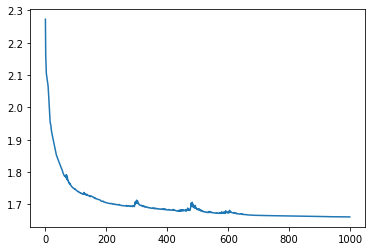

In [38]:
plt.plot(losses)
plt.show()

In [39]:
with torch.no_grad():
    model = model.to('cpu')
    y_pred = model(x_test)
    y_pred = y_pred.detach().numpy()
    predicted = np.argmax(y_pred, axis =1)
    accuracy = (accuracy_score(predicted, y_test))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [40]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [4.3208303e-15 6.4895224e-24 9.9686170e-01 3.1130633e-03 2.5311268e-05
 1.1924450e-16 1.9618179e-43 2.9427268e-44 1.1194429e-30 8.1611297e-26]
argmax를 한 후의 output은 2
accuracy는 0.7333333333333333


In [41]:
row={'accuracy':accuracy,'epoch':epoch,'hidden_layer':3,'optimizer':'adam','learning_rate':lr,'activate_func':'leaky_ReLU'}
result=result.append(row,ignore_index=True)

In [42]:
result

,activate_func,learning_rate,hidden_layer,epoch,accuracy,optimizer
0,ReLU,0.0001,3,1000,0.692000,adam
1,leaky_ReLU,0.0010,3,1000,0.733333,adam


## Optimizer 변경
Adam 이외에도 SGD, RMSprop, AdaGrad와 같은 다른 optimizer를 사용해보고 성능을 비교해본다

In [43]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=54, out_features=7000, bias=True)
    (1): leakyrelu(negative_slope=0.01)
    (2): BatchNorm1d(7000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=7000, out_features=40, bias=True)
    (1): leakyrelu(negative_slope=0.01)
  )
  (layer3): Sequential(
    (0): Linear(in_features=40, out_features=20, bias=True)
    (1): leakyrelu(negative_slope=0.01)
  )
  (layer4): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [44]:
loss_fn  = nn.CrossEntropyLoss().to(device)
lr = 0.0001
optimizer = optim.RMSprop(model.parameters(), lr)

In [45]:
losses = []
epoch = 1000
for i in tqdm(range(epoch)):

    optimizer.zero_grad()
    hypothesis = model(x_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())

    if i%10 == 0:
        print(i, cost.item())

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.3149025440216064


  2%|▏         | 15/1000 [00:00<00:44, 22.34it/s]

10 1.97267484664917


  2%|▏         | 24/1000 [00:01<00:43, 22.18it/s]

20 1.879931092262268


  3%|▎         | 33/1000 [00:01<00:43, 22.28it/s]

30 1.8618675470352173


  4%|▍         | 45/1000 [00:02<00:42, 22.29it/s]

40 1.845908284187317


  5%|▌         | 54/1000 [00:02<00:42, 22.36it/s]

50 1.840338110923767


  6%|▋         | 63/1000 [00:02<00:42, 22.22it/s]

60 1.8284651041030884


  8%|▊         | 75/1000 [00:03<00:41, 22.38it/s]

70 1.8236316442489624


  8%|▊         | 84/1000 [00:03<00:40, 22.36it/s]

80 1.819663166999817


  9%|▉         | 93/1000 [00:04<00:40, 22.36it/s]

90 1.8104512691497803


 10%|█         | 105/1000 [00:04<00:39, 22.40it/s]

100 1.8062735795974731


 11%|█▏        | 114/1000 [00:05<00:39, 22.23it/s]

110 1.8033684492111206


 12%|█▏        | 123/1000 [00:05<00:39, 22.28it/s]

120 1.7991844415664673


 14%|█▎        | 135/1000 [00:06<00:38, 22.23it/s]

130 1.794600009918213


 14%|█▍        | 144/1000 [00:06<00:38, 22.28it/s]

140 1.7915915250778198


 15%|█▌        | 153/1000 [00:06<00:37, 22.33it/s]

150 1.7958500385284424


 16%|█▋        | 165/1000 [00:07<00:37, 22.31it/s]

160 1.786854863166809


 17%|█▋        | 174/1000 [00:07<00:36, 22.39it/s]

170 1.784682035446167


 18%|█▊        | 183/1000 [00:08<00:36, 22.39it/s]

180 1.7830911874771118


 20%|█▉        | 195/1000 [00:08<00:35, 22.40it/s]

190 1.77860689163208


 20%|██        | 204/1000 [00:09<00:35, 22.44it/s]

200 1.7771921157836914


 21%|██▏       | 213/1000 [00:09<00:35, 22.41it/s]

210 1.7732155323028564


 22%|██▎       | 225/1000 [00:10<00:34, 22.37it/s]

220 1.772347092628479


 23%|██▎       | 234/1000 [00:10<00:34, 22.23it/s]

230 1.7698981761932373


 24%|██▍       | 243/1000 [00:10<00:33, 22.31it/s]

240 1.7741364240646362


 26%|██▌       | 255/1000 [00:11<00:33, 22.41it/s]

250 1.7724255323410034


 26%|██▋       | 264/1000 [00:11<00:32, 22.40it/s]

260 1.7671818733215332


 27%|██▋       | 273/1000 [00:12<00:32, 22.38it/s]

270 1.7647674083709717


 28%|██▊       | 285/1000 [00:12<00:31, 22.43it/s]

280 1.7637946605682373


 29%|██▉       | 294/1000 [00:13<00:31, 22.46it/s]

290 1.7615063190460205


 30%|███       | 303/1000 [00:13<00:31, 22.34it/s]

300 1.7614549398422241


 32%|███▏      | 315/1000 [00:14<00:30, 22.41it/s]

310 1.7616246938705444


 32%|███▏      | 324/1000 [00:14<00:30, 22.24it/s]

320 1.7632973194122314


 33%|███▎      | 333/1000 [00:14<00:29, 22.32it/s]

330 1.7617995738983154


 34%|███▍      | 345/1000 [00:15<00:29, 22.38it/s]

340 1.7595174312591553


 35%|███▌      | 354/1000 [00:15<00:28, 22.41it/s]

350 1.7555038928985596


 36%|███▋      | 363/1000 [00:16<00:28, 22.37it/s]

360 1.7584638595581055


 38%|███▊      | 375/1000 [00:16<00:27, 22.36it/s]

370 1.755195140838623


 38%|███▊      | 384/1000 [00:17<00:27, 22.36it/s]

380 1.7558308839797974


 39%|███▉      | 393/1000 [00:17<00:27, 22.26it/s]

390 1.7573800086975098


 40%|████      | 405/1000 [00:18<00:26, 22.33it/s]

400 1.7526888847351074


 41%|████▏     | 414/1000 [00:18<00:26, 22.11it/s]

410 1.7519935369491577


 42%|████▏     | 423/1000 [00:18<00:26, 21.98it/s]

420 1.7540830373764038


 44%|████▎     | 435/1000 [00:19<00:25, 22.14it/s]

430 1.7505420446395874


 44%|████▍     | 444/1000 [00:19<00:24, 22.31it/s]

440 1.7510132789611816


 45%|████▌     | 453/1000 [00:20<00:24, 22.27it/s]

450 1.7496347427368164


 46%|████▋     | 465/1000 [00:20<00:24, 21.98it/s]

460 1.7490220069885254


 47%|████▋     | 474/1000 [00:21<00:23, 22.06it/s]

470 1.7527090311050415


 48%|████▊     | 483/1000 [00:21<00:23, 21.93it/s]

480 1.7487341165542603


 50%|████▉     | 495/1000 [00:22<00:23, 21.89it/s]

490 1.7477855682373047


 50%|█████     | 504/1000 [00:22<00:22, 22.22it/s]

500 1.746467113494873


 51%|█████▏    | 513/1000 [00:22<00:21, 22.31it/s]

510 1.7462043762207031


 52%|█████▎    | 525/1000 [00:23<00:21, 22.36it/s]

520 1.743557095527649


 53%|█████▎    | 534/1000 [00:23<00:20, 22.38it/s]

530 1.7434616088867188


 54%|█████▍    | 543/1000 [00:24<00:20, 22.39it/s]

540 1.7418980598449707


 56%|█████▌    | 555/1000 [00:24<00:19, 22.41it/s]

550 1.7439786195755005


 56%|█████▋    | 564/1000 [00:25<00:19, 22.39it/s]

560 1.741560935974121


 57%|█████▋    | 573/1000 [00:25<00:19, 22.37it/s]

570 1.7390819787979126


 58%|█████▊    | 585/1000 [00:26<00:18, 22.37it/s]

580 1.7406326532363892


 59%|█████▉    | 594/1000 [00:26<00:18, 22.46it/s]

590 1.7442759275436401


 60%|██████    | 603/1000 [00:27<00:17, 22.42it/s]

600 1.7410168647766113


 62%|██████▏   | 615/1000 [00:27<00:17, 22.44it/s]

610 1.7382581233978271


 62%|██████▏   | 624/1000 [00:27<00:16, 22.47it/s]

620 1.740155816078186


 63%|██████▎   | 633/1000 [00:28<00:16, 22.36it/s]

630 1.7434942722320557


 64%|██████▍   | 645/1000 [00:28<00:15, 22.35it/s]

640 1.7332860231399536


 65%|██████▌   | 654/1000 [00:29<00:15, 22.29it/s]

650 1.7332885265350342


 66%|██████▋   | 663/1000 [00:29<00:15, 22.35it/s]

660 1.7336584329605103


 68%|██████▊   | 675/1000 [00:30<00:14, 22.25it/s]

670 1.7331501245498657


 68%|██████▊   | 684/1000 [00:30<00:14, 22.14it/s]

680 1.730512261390686


 69%|██████▉   | 693/1000 [00:31<00:13, 22.24it/s]

690 1.7329390048980713


 70%|███████   | 705/1000 [00:31<00:13, 22.27it/s]

700 1.7291655540466309


 71%|███████▏  | 714/1000 [00:31<00:12, 22.18it/s]

710 1.7345893383026123


 72%|███████▏  | 723/1000 [00:32<00:12, 22.28it/s]

720 1.7290047407150269


 74%|███████▎  | 735/1000 [00:32<00:11, 22.38it/s]

730 1.7290658950805664


 74%|███████▍  | 744/1000 [00:33<00:11, 22.26it/s]

740 1.732627034187317


 75%|███████▌  | 753/1000 [00:33<00:11, 22.22it/s]

750 1.725944995880127


 76%|███████▋  | 765/1000 [00:34<00:10, 22.26it/s]

760 1.72573721408844


 77%|███████▋  | 774/1000 [00:34<00:10, 22.27it/s]

770 1.7236332893371582


 78%|███████▊  | 783/1000 [00:35<00:09, 22.32it/s]

780 1.727797031402588


 80%|███████▉  | 795/1000 [00:35<00:09, 22.33it/s]

790 1.7128552198410034


 80%|████████  | 804/1000 [00:36<00:08, 22.17it/s]

800 1.7051353454589844


 81%|████████▏ | 813/1000 [00:36<00:08, 22.25it/s]

810 1.6993472576141357


 82%|████████▎ | 825/1000 [00:36<00:07, 22.23it/s]

820 1.6964678764343262


 83%|████████▎ | 834/1000 [00:37<00:07, 22.12it/s]

830 1.6896408796310425


 84%|████████▍ | 843/1000 [00:37<00:07, 22.12it/s]

840 1.6873444318771362


 86%|████████▌ | 855/1000 [00:38<00:06, 22.25it/s]

850 1.684457540512085


 86%|████████▋ | 864/1000 [00:38<00:06, 22.12it/s]

860 1.6826980113983154


 87%|████████▋ | 873/1000 [00:39<00:05, 22.24it/s]

870 1.676307201385498


 88%|████████▊ | 885/1000 [00:39<00:05, 22.34it/s]

880 1.6755852699279785


 89%|████████▉ | 894/1000 [00:40<00:04, 22.37it/s]

890 1.6718103885650635


 90%|█████████ | 903/1000 [00:40<00:04, 22.36it/s]

900 1.6725752353668213


 92%|█████████▏| 915/1000 [00:41<00:03, 22.41it/s]

910 1.6682090759277344


 92%|█████████▏| 924/1000 [00:41<00:03, 22.43it/s]

920 1.6675678491592407


 93%|█████████▎| 933/1000 [00:41<00:03, 22.27it/s]

930 1.6682524681091309


 94%|█████████▍| 945/1000 [00:42<00:02, 22.33it/s]

940 1.6692984104156494


 95%|█████████▌| 954/1000 [00:42<00:02, 22.18it/s]

950 1.6635054349899292


 96%|█████████▋| 963/1000 [00:43<00:01, 22.27it/s]

960 1.6622177362442017


 98%|█████████▊| 975/1000 [00:43<00:01, 22.36it/s]

970 1.6615262031555176


 98%|█████████▊| 984/1000 [00:44<00:00, 22.41it/s]

980 1.6604702472686768


 99%|█████████▉| 993/1000 [00:44<00:00, 22.34it/s]

990 1.6587990522384644


100%|██████████| 1000/1000 [00:44<00:00, 22.32it/s]


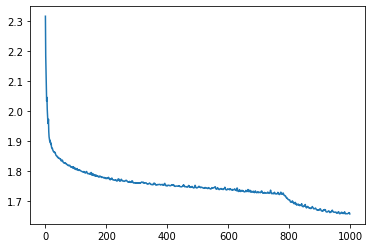

In [46]:
plt.plot(losses)
plt.show()

In [47]:
with torch.no_grad():
    model = model.to('cpu')
    y_pred = model(x_test)
    y_pred = y_pred.detach().numpy()
    predicted = np.argmax(y_pred, axis =1)
    accuracy = (accuracy_score(predicted, y_test))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [48]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1.1033398e-07 1.2195190e-11 4.2021699e-11 2.3629460e-01 3.4429729e-01
 4.5162332e-10 4.1916564e-01 9.1277677e-08 2.4216728e-04 1.1718444e-16]
argmax를 한 후의 output은 6
accuracy는 0.7623333333333333


In [49]:
row={'accuracy':accuracy,'epoch':epoch,'hidden_layer':3,'optimizer':'RMSprop','learning_rate':lr,'activate_func':'leaky_ReLU'}
result=result.append(row,ignore_index=True)

In [50]:
result

,activate_func,learning_rate,hidden_layer,epoch,accuracy,optimizer
0,ReLU,0.0001,3,1000,0.692000,adam
1,leaky_ReLU,0.0010,3,1000,0.733333,adam
2,leaky_ReLU,0.0001,3,1000,0.762333,RMSprop


## Hidden layer, neuron 조정

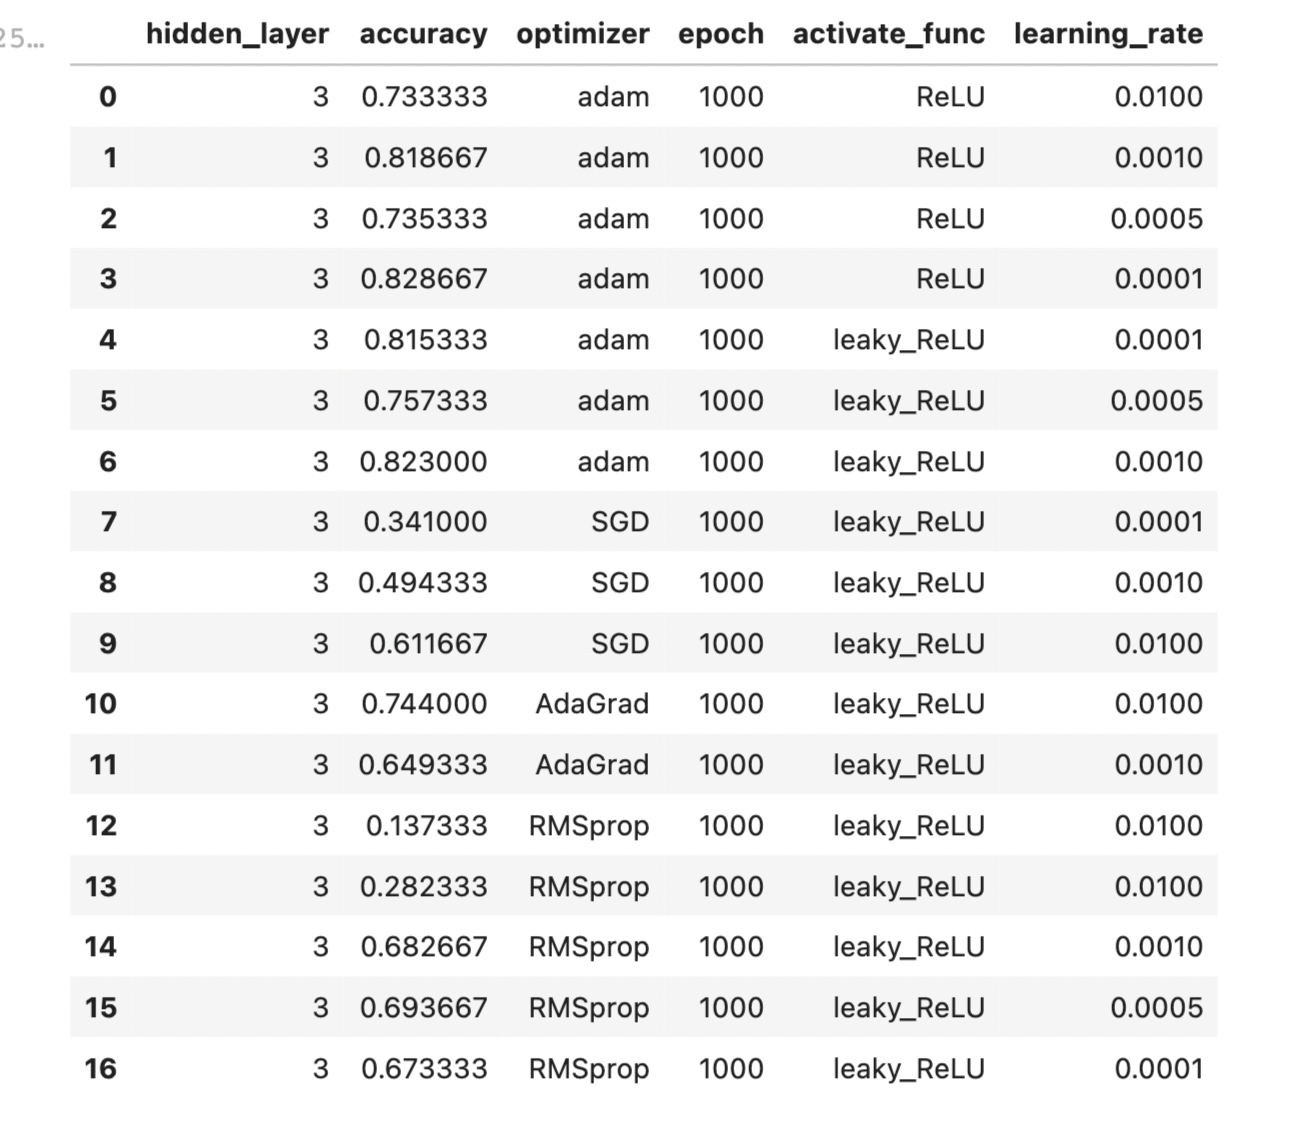

추가적으로 activate_func, optimizer, learning rate를 조정하면서 돌려본 결과 <br>
activate_func = "ReLU", optimizer = 'adam', learning_rate = 0.0001일때가 가장 성능이 좋았다<br>
여기서 추가적으로 성능을 높이기 위해 Hidden layer의 개수를 늘리고 neuron 수치도 조정한다

In [51]:
class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(54,7000,bias=True), # input_layer = 54, hidden_layer1 = 7000
            relu(),
            nn.BatchNorm1d(7000) 
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(7000,1000,bias=True), # hidden_layer1 = 7000, hidden_layer2 = 1000
            relu()
        )

        self.layer3 = nn.Sequential(
            nn.Linear(1000,300, bias=True), # hidden_layer2 = 1000, hidden_layer3 = 300
            relu()
        )
        
        self.layer4 = nn.Sequential(
            nn.Linear(300,50, bias=True), # hidden_layer3 = 300, hidden_layer4 = 50
            relu()
        )
        
        self.layer5 = nn.Sequential(
            nn.Linear(50,20, bias=True), # hidden_layer4 = 50, hidden_layer5 = 20
            relu()
        )
        
        self.layer6 = nn.Sequential(
            nn.Linear(20,10, bias=True), # hidden_layer5 = 20, output_layer = 10
            nn.Softmax()
        )
        
   

    def forward(self,x):
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        output = self.layer4(output)
        return output    

In [52]:
model = Model().to(device)
model.apply(init_weights)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=54, out_features=7000, bias=True)
    (1): relu()
    (2): BatchNorm1d(7000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=7000, out_features=1000, bias=True)
    (1): relu()
  )
  (layer3): Sequential(
    (0): Linear(in_features=1000, out_features=300, bias=True)
    (1): relu()
  )
  (layer4): Sequential(
    (0): Linear(in_features=300, out_features=50, bias=True)
    (1): relu()
  )
  (layer5): Sequential(
    (0): Linear(in_features=50, out_features=20, bias=True)
    (1): relu()
  )
  (layer6): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [53]:
loss_fn  = nn.CrossEntropyLoss().to(device)
lr = 0.0001
optimizer = optim.Adam(model.parameters(), lr)

In [54]:
losses = []
epoch = 1000
for i in tqdm(range(epoch)):

    optimizer.zero_grad()
    hypothesis = model(x_train)

    # 비용 함수
    cost = loss_fn(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item())

    if i%10 == 0:
        print(i, cost.item())

  0%|          | 2/1000 [00:00<01:39, 10.06it/s]

0 3.9972591400146484


  1%|          | 12/1000 [00:01<01:48,  9.10it/s]

10 1.8062560558319092


  2%|▏         | 22/1000 [00:02<01:47,  9.13it/s]

20 1.232666015625


  3%|▎         | 32/1000 [00:03<01:46,  9.13it/s]

30 0.7917175889015198


  4%|▍         | 42/1000 [00:04<01:44,  9.15it/s]

40 0.639750599861145


  5%|▌         | 52/1000 [00:05<01:44,  9.10it/s]

50 0.5661816596984863


  6%|▌         | 62/1000 [00:06<01:43,  9.05it/s]

60 0.5184950232505798


  7%|▋         | 72/1000 [00:07<01:42,  9.04it/s]

70 0.4852716624736786


  8%|▊         | 82/1000 [00:09<01:41,  9.06it/s]

80 0.4584633708000183


  9%|▉         | 92/1000 [00:10<01:40,  9.04it/s]

90 0.43609991669654846


 10%|█         | 102/1000 [00:11<01:38,  9.10it/s]

100 0.4168213903903961


 11%|█         | 112/1000 [00:12<01:37,  9.10it/s]

110 0.39950066804885864


 12%|█▏        | 122/1000 [00:13<01:36,  9.09it/s]

120 0.3836694657802582


 13%|█▎        | 132/1000 [00:14<01:35,  9.09it/s]

130 0.3688655197620392


 14%|█▍        | 142/1000 [00:15<01:35,  9.02it/s]

140 0.3554660677909851


 15%|█▌        | 152/1000 [00:16<01:34,  8.97it/s]

150 0.3429563641548157


 16%|█▌        | 162/1000 [00:17<01:32,  9.02it/s]

160 0.3307650685310364


 17%|█▋        | 172/1000 [00:18<01:30,  9.11it/s]

170 0.31985989212989807


 18%|█▊        | 182/1000 [00:20<01:30,  9.06it/s]

180 0.30907049775123596


 19%|█▉        | 192/1000 [00:21<01:30,  8.97it/s]

190 0.29870909452438354


 20%|██        | 202/1000 [00:22<01:28,  9.04it/s]

200 0.2889309525489807


 21%|██        | 212/1000 [00:23<01:28,  8.95it/s]

210 0.2798289656639099


 22%|██▏       | 222/1000 [00:24<01:25,  9.07it/s]

220 0.27221930027008057


 23%|██▎       | 232/1000 [00:25<01:24,  9.07it/s]

230 0.26345720887184143


 24%|██▍       | 242/1000 [00:26<01:23,  9.08it/s]

240 0.25475433468818665


 25%|██▌       | 252/1000 [00:27<01:23,  8.99it/s]

250 0.24823886156082153


 26%|██▌       | 262/1000 [00:28<01:21,  9.04it/s]

260 0.23987771570682526


 27%|██▋       | 272/1000 [00:30<01:20,  9.05it/s]

270 0.23232097923755646


 28%|██▊       | 282/1000 [00:31<01:19,  9.01it/s]

280 0.22519820928573608


 29%|██▉       | 292/1000 [00:32<01:18,  9.01it/s]

290 0.22075046598911285


 30%|███       | 302/1000 [00:33<01:17,  9.05it/s]

300 0.21303078532218933


 31%|███       | 312/1000 [00:34<01:16,  9.02it/s]

310 0.20569808781147003


 32%|███▏      | 322/1000 [00:35<01:14,  9.05it/s]

320 0.20038321614265442


 33%|███▎      | 332/1000 [00:36<01:13,  9.07it/s]

330 0.19325371086597443


 34%|███▍      | 342/1000 [00:37<01:13,  8.97it/s]

340 0.19028368592262268


 35%|███▌      | 352/1000 [00:38<01:12,  8.97it/s]

350 0.18417969346046448


 36%|███▌      | 362/1000 [00:39<01:10,  9.00it/s]

360 0.17683900892734528


 37%|███▋      | 372/1000 [00:41<01:10,  8.91it/s]

370 0.17069436609745026


 38%|███▊      | 382/1000 [00:42<01:07,  9.10it/s]

380 0.16683876514434814


 39%|███▉      | 392/1000 [00:43<01:07,  9.01it/s]

390 0.1612432897090912


 40%|████      | 402/1000 [00:44<01:05,  9.10it/s]

400 0.15611279010772705


 41%|████      | 412/1000 [00:45<01:05,  9.01it/s]

410 0.15091970562934875


 42%|████▏     | 422/1000 [00:46<01:03,  9.12it/s]

420 0.14653068780899048


 43%|████▎     | 432/1000 [00:47<01:02,  9.11it/s]

430 0.14398044347763062


 44%|████▍     | 442/1000 [00:48<01:00,  9.16it/s]

440 0.14159609377384186


 45%|████▌     | 452/1000 [00:49<01:00,  9.08it/s]

450 0.13401222229003906


 46%|████▌     | 462/1000 [00:50<00:59,  9.11it/s]

460 0.12878747284412384


 47%|████▋     | 472/1000 [00:52<00:57,  9.13it/s]

470 0.12573467195034027


 48%|████▊     | 482/1000 [00:53<00:56,  9.11it/s]

480 0.12012966722249985


 49%|████▉     | 492/1000 [00:54<00:56,  9.05it/s]

490 0.11652594804763794


 50%|█████     | 502/1000 [00:55<00:55,  9.03it/s]

500 0.1122632697224617


 51%|█████     | 512/1000 [00:56<00:53,  9.07it/s]

510 0.10849010944366455


 52%|█████▏    | 522/1000 [00:57<00:52,  9.06it/s]

520 0.10618725419044495


 53%|█████▎    | 532/1000 [00:58<00:51,  9.10it/s]

530 0.10153372585773468


 54%|█████▍    | 542/1000 [00:59<00:50,  9.16it/s]

540 0.09888491034507751


 55%|█████▌    | 552/1000 [01:00<00:48,  9.14it/s]

550 0.09572187811136246


 56%|█████▌    | 562/1000 [01:01<00:48,  9.12it/s]

560 0.0918164923787117


 57%|█████▋    | 572/1000 [01:03<00:47,  9.07it/s]

570 0.09060166776180267


 58%|█████▊    | 582/1000 [01:04<00:45,  9.12it/s]

580 0.086046002805233


 59%|█████▉    | 592/1000 [01:05<00:44,  9.09it/s]

590 0.08270728588104248


 60%|██████    | 602/1000 [01:06<00:43,  9.14it/s]

600 0.08027450740337372


 61%|██████    | 612/1000 [01:07<00:42,  9.08it/s]

610 0.07806956768035889


 62%|██████▏   | 622/1000 [01:08<00:41,  9.18it/s]

620 0.07554281502962112


 63%|██████▎   | 632/1000 [01:09<00:40,  9.18it/s]

630 0.07296104729175568


 64%|██████▍   | 642/1000 [01:10<00:39,  9.17it/s]

640 0.07102573662996292


 65%|██████▌   | 652/1000 [01:11<00:38,  9.03it/s]

650 0.06800570338964462


 66%|██████▌   | 662/1000 [01:12<00:36,  9.16it/s]

660 0.06610643863677979


 67%|██████▋   | 672/1000 [01:14<00:36,  9.03it/s]

670 0.0636279284954071


 68%|██████▊   | 682/1000 [01:15<00:34,  9.15it/s]

680 0.06245526671409607


 69%|██████▉   | 692/1000 [01:16<00:33,  9.13it/s]

690 0.05967127904295921


 70%|███████   | 702/1000 [01:17<00:32,  9.11it/s]

700 0.05755176767706871


 71%|███████   | 712/1000 [01:18<00:31,  9.10it/s]

710 0.056696806102991104


 72%|███████▏  | 722/1000 [01:19<00:30,  9.10it/s]

720 0.05491126701235771


 73%|███████▎  | 732/1000 [01:20<00:29,  9.09it/s]

730 0.052439115941524506


 74%|███████▍  | 742/1000 [01:21<00:28,  9.01it/s]

740 0.050770353525877


 75%|███████▌  | 752/1000 [01:22<00:27,  9.12it/s]

750 0.04889041557908058


 76%|███████▌  | 762/1000 [01:23<00:26,  9.09it/s]

760 0.04812196269631386


 77%|███████▋  | 772/1000 [01:25<00:25,  9.10it/s]

770 0.046421270817518234


 78%|███████▊  | 782/1000 [01:26<00:23,  9.10it/s]

780 0.04474940150976181


 79%|███████▉  | 792/1000 [01:27<00:22,  9.09it/s]

790 0.04311719909310341


 80%|████████  | 802/1000 [01:28<00:21,  9.13it/s]

800 0.06610438972711563


 81%|████████  | 812/1000 [01:29<00:20,  9.16it/s]

810 0.35664334893226624


 82%|████████▏ | 822/1000 [01:30<00:19,  9.11it/s]

820 0.15886881947517395


 83%|████████▎ | 832/1000 [01:31<00:18,  9.17it/s]

830 0.09715690463781357


 84%|████████▍ | 842/1000 [01:32<00:17,  9.07it/s]

840 0.06691444665193558


 85%|████████▌ | 852/1000 [01:33<00:16,  9.05it/s]

850 0.05668498948216438


 86%|████████▌ | 862/1000 [01:34<00:15,  9.10it/s]

860 0.05124001204967499


 87%|████████▋ | 872/1000 [01:35<00:14,  9.06it/s]

870 0.04806232079863548


 88%|████████▊ | 882/1000 [01:37<00:13,  9.03it/s]

880 0.045952748507261276


 89%|████████▉ | 892/1000 [01:38<00:11,  9.10it/s]

890 0.04427006468176842


 90%|█████████ | 902/1000 [01:39<00:10,  9.04it/s]

900 0.04273722693324089


 91%|█████████ | 912/1000 [01:40<00:09,  9.06it/s]

910 0.0415327362716198


 92%|█████████▏| 922/1000 [01:41<00:08,  9.00it/s]

920 0.040487345308065414


 93%|█████████▎| 932/1000 [01:42<00:07,  8.91it/s]

930 0.03952518850564957


 94%|█████████▍| 942/1000 [01:43<00:06,  9.04it/s]

940 0.038679786026477814


 95%|█████████▌| 952/1000 [01:44<00:05,  9.10it/s]

950 0.037861667573451996


 96%|█████████▌| 962/1000 [01:45<00:04,  9.03it/s]

960 0.037100378423929214


 97%|█████████▋| 972/1000 [01:47<00:03,  9.13it/s]

970 0.03636474534869194


 98%|█████████▊| 982/1000 [01:48<00:01,  9.11it/s]

980 0.035640303045511246


 99%|█████████▉| 992/1000 [01:49<00:00,  9.09it/s]

990 0.034995660185813904


100%|██████████| 1000/1000 [01:50<00:00,  9.08it/s]


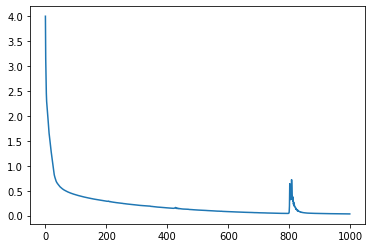

In [55]:
plt.plot(losses)
plt.show()

In [56]:
with torch.no_grad():
    model = model.to('cpu')
    y_pred = model(x_test)
    y_pred = y_pred.detach().numpy()
    predicted = np.argmax(y_pred, axis =1)
    accuracy = (accuracy_score(predicted, y_test))

In [57]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [ 0.          6.1331587  21.854969   21.934479   20.968227    6.1333785
 23.256529    0.          0.          0.          0.          3.074167
  0.          0.          0.          0.          0.          0.
  0.          3.3803887   0.          4.229843    0.          0.
  0.          0.          0.          0.          5.1437726   2.2354095
  0.          0.          0.          0.          0.          0.
  0.          0.46578193  0.6436858   0.          0.          0.
  0.          0.          2.9470313   8.366446    0.          0.
  0.          2.750792  ]
argmax를 한 후의 output은 6
accuracy는 0.856


In [58]:
row={'accuracy':accuracy,'epoch':epoch,'hidden_layer':5,'optimizer':'Adam','learning_rate':lr,'activate_func':'ReLU'}
result=result.append(row,ignore_index=True)

In [59]:
result

,activate_func,learning_rate,hidden_layer,epoch,accuracy,optimizer
0,ReLU,0.0001,3,1000,0.692000,adam
1,leaky_ReLU,0.0010,3,1000,0.733333,adam
2,leaky_ReLU,0.0001,3,1000,0.762333,RMSprop
3,ReLU,0.0001,5,1000,0.856000,Adam


In [60]:
result.sort_values("accuracy",ascending=False)

,activate_func,learning_rate,hidden_layer,epoch,accuracy,optimizer
3,ReLU,0.0001,5,1000,0.856000,Adam
2,leaky_ReLU,0.0001,3,1000,0.762333,RMSprop
1,leaky_ReLU,0.0010,3,1000,0.733333,adam
0,ReLU,0.0001,3,1000,0.692000,adam


hidden layer의 개수를 늘렸더니 accuracy가 0.8560000으로 증가하였고 <br>
loss도 약 0.03으로 이전보다 매우 감소한 수치를 얻었다